In [331]:
import math
import random
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.svm import LinearSVC
from sklearn.preprocessing import minmax_scale
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.impute import KNNImputer
import scipy.sparse as sp
from sklearn import tree
from sklearn.neural_network import MLPClassifiers
from sklearn.ensemble import BaggingClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm


In [332]:
# read from csv to form data frames
train = pd.read_csv("book_rating_train.csv", index_col = False, delimiter = ',')
test = pd.read_csv("book_rating_test.csv", index_col = False, delimiter = ',')


In [333]:
# seperate x and y for training and testing data frames
y_train = train.iloc[:, -1]
x_train = train.iloc[:, :-1]

y_test = test.iloc[:, -1]
x_test = test.iloc[:, :]

train_corpus_name = train['Name']
test_corpus_name = test['Name']

In [334]:
# concatenate date as a single varaible by finding the accurate day
x_train['PublishTime'] = 365*x_train['PublishYear'] + 30*x_train['PublishMonth'] + x_train['PublishDay']
x_test['PublishTime'] = 365*x_test['PublishYear'] + 30*x_test['PublishMonth'] + x_test['PublishDay']

x_train['PublishTime'] = x_train['PublishTime'].astype(str)
x_test['PublishTime'] = x_test['PublishTime'].astype(str)

x_train['pagesNumber'] = x_train['pagesNumber'].astype(str)
x_test['pagesNumber'] = x_test['pagesNumber'].astype(str)

In [335]:
# perform vector transformation
def vectortransform(train, test):
    vocab = CountVectorizer(stop_words='english').fit(train)
    x_train = vocab.transform(train)
    x_test = vocab.transform(test)
    return x_train, x_test

In [336]:
# each column has a single variable name
train_name = x_train['Name']
train_aut = x_train['Authors']
train_publisher = x_train['Publisher'].replace(np.nan,'',regex=True)
train_desc = x_train['Description']
train_lang = x_train['Language'].replace(np.nan,'',regex=True)
train_time = x_train['PublishTime']
train_num = x_train['pagesNumber']

test_name = x_test['Name']
test_aut = x_test['Authors']
test_publisher = x_test['Publisher'].replace(np.nan,'',regex=True)
test_desc = x_test['Description']
test_lang = x_test['Language'].replace(np.nan,'',regex=True)
test_time = x_test['PublishTime']
test_num = x_test['pagesNumber']

# transform each column
train_name, test_name = vectortransform(train_name, test_name)
train_aut, test_aut = vectortransform(train_aut, test_aut)
train_publisher, test_publisher = vectortransform(train_publisher, test_publisher)
train_desc, test_desc = vectortransform(train_desc, test_desc)
train_lang, test_lang = vectortransform(train_lang, test_lang)
train_time, test_time = vectortransform(train_time, test_time)
train_num, test_num = vectortransform(train_num, test_num)

# list_other_features = ['PublishTime', 'pagesNumber']
# x_train_other_features = sp.csr_matrix(train[list_other_features].values)
# x_train_joined_features = sp.hstack((train_name, train_aut, train_publisher, train_desc, x_train_other_features))

# x_test_other_features = sp.csr_matrix(test[list_other_features].values)
# x_test_joined_features = sp.hstack((test_name, test_aut, test_publisher, test_desc, x_test_other_features))

#join all features together as a sinlge sparese matrix
x_train_joined_features = sp.hstack((train_name, train_aut, train_publisher, train_desc, train_lang, train_time, train_num))
x_test_joined_features = sp.hstack((test_name, test_aut, test_publisher, test_desc, test_lang, test_time, test_num))

In [338]:
# Multinomial Naive Bayes model
nb = MultinomialNB()
nb.fit(x_train_joined_features, y_train)

y_pred = nb.predict(x_test_joined_features)
y_pred

result1 = pd.DataFrame(y_pred)

result1.index += 1
result1.to_csv('multinomialnb.csv', index_label = "id", header  = ['rating_label'])

In [339]:
# # This code is used to check rating distributions
# result = pd.read_csv("multinomialnb.csv", index_col = False, delimiter = ',')
# best = pd.read_csv("best.csv", index_col = False, delimiter = ',')

# result = result['rating_label'].tolist()
# best = best['rating_label'].tolist()

# count = 0
# total = len(best)
# for i in range(total):
#     if result[i] == best[i]:
#         count += 1

# print(count/total)

In [340]:
# # This code is used to check rating distributions
# a = 0
# b = 0
# c = 0
# d = 0
# e = 0
# f = 0


# for i in range(total):
#     if result[i] == 3:
#         a += 1
#     if result[i] == 4:
#         b += 1
#     else:
#         c += 1
# print (a, b, c)

# for i in range(total):
#     if best[i] == 3:
#         d += 1
#     if best[i] == 4:
#         e += 1
#     else:
#         f += 1
# print (d, e, f)

In [ ]:
# performace improvements by using bagging
# model = BaggingClassifier(estimator=MultinomialNB(), n_estimators=24, random_state=0).fit(x_train_joined_features, y_train)

# y_pred = model.predict(x_test_joined_features)
# y_pred

# result1 = pd.DataFrame(y_pred)

# result1.index += 1
# result1.to_csv('multinomialnb.csv', index_label = "id", header  = ['rating_label'])

In [ ]:
# # gradient boosting method for improve performance

# from sklearn.ensemble import GradientBoostingClassifier
# model = GradientBoostingClassifier(learning_rate=0.8).fit(x_train_joined_features, y_train)

# # lr_list = list()
# # for i in range(10,25):
# #     lr_list.append(i)

# # lr_list = list()
# # for i in range(1,20):
# #     lr_list.append(i)

# # for learning_rate in lr_list:
# #     gb_clf = GradientBoostingClassifier(n_estimators=learning_rate, learning_rate=0.8, max_features=19, max_depth=19, random_state=0)
# #     gb_clf.fit(x_train_joined_features, y_train)

# #     print("n_estimators: ", learning_rate)
# #     print("Accuracy score (training): {0:.10f}".format(gb_clf.score(x_train_joined_features, y_train)))


# y_pred = model.predict(x_test_joined_features)
# y_pred

# result1 = pd.DataFrame(y_pred)

# result1.index += 1
# result1.to_csv('multinomialnb.csv', index_label = "id", header  = ['rating_label'])

C:\Users\admin\AppData\Local\Temp\ipykernel_27268\2006402965.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = x_train.corr()


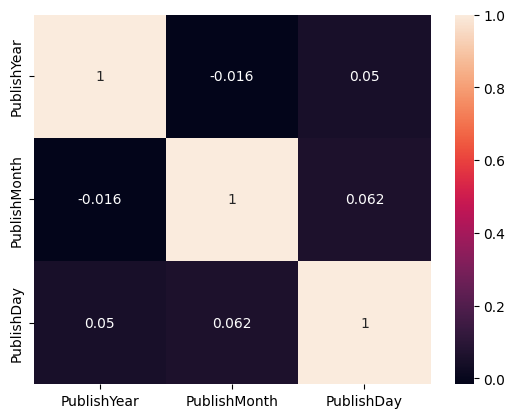

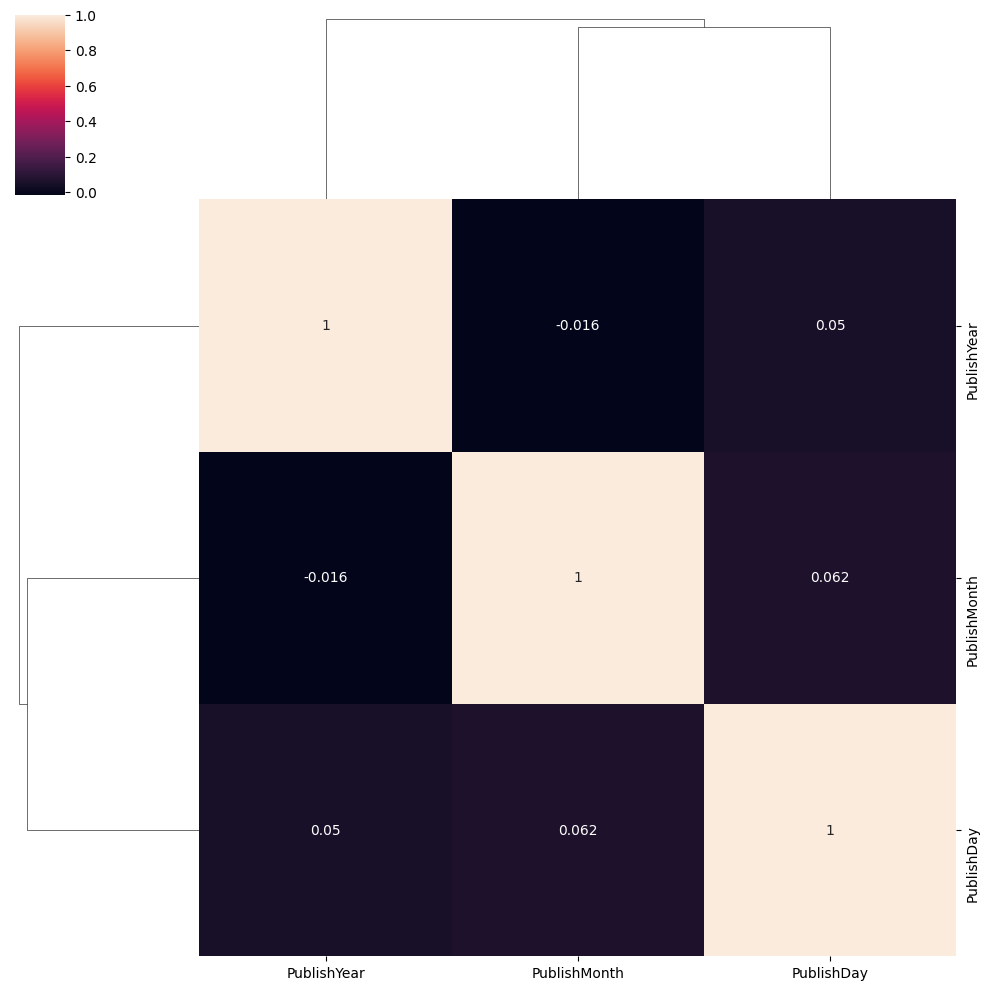

In [341]:
# cross validation heatmap for features

import seaborn as sns

# calculate the correlations
correlations = x_train.corr()

# plot the heatmap 
sns.heatmap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=True)

# plot the clustermap 
sns.clustermap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=True)

In [343]:
# SVC Model
linearsvc = LinearSVC()
linearsvc.fit(x_train_joined_features, y_train)

y_pred = linearsvc.predict(x_test_joined_features)
y_pred

result = pd.DataFrame(y_pred)

result.index += 1
result.to_csv('linearsvc.csv', index_label = "id", header  = ['rating_label'])

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [344]:
# Decision Trees Model
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train_joined_features, y_train)

y_pred = clf.predict(x_test_joined_features)
y_pred

result = pd.DataFrame(y_pred)

result.index += 1
result.to_csv('decisionTrees.csv', index_label = "id", header  = ['rating_label'])

In [345]:
# Neural Network Model
clf = MLPClassifier(solver='lbfgs', alpha=3.5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(x_train_joined_features, y_train)

y_pred = clf.predict(x_test_joined_features)

result = pd.DataFrame(y_pred)
result.index += 1
result.to_csv('NeuralNetwork.csv', index_label = "id", header  = ['rating_label'])

In [346]:
# mix models
nb = MultinomialNB()
nb.fit(x_train_joined_features, y_train)
y_pred1 = nb.predict(x_test_joined_features)

linearsvc = LinearSVC()
linearsvc.fit(x_train_joined_features, y_train)
y_pred2 = linearsvc.predict(x_test_joined_features)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train_joined_features, y_train)
y_pred3 = clf.predict(x_test_joined_features)

clf = MLPClassifier(solver='lbfgs', alpha=3.5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(x_train_joined_features, y_train)
y_pred4 = clf.predict(x_test_joined_features)

num = len(y_pred1)
preds = list()

for i in range(num):
    pred1 = y_pred1[i]
    pred2 = y_pred2[i]
    pred3 = y_pred3[i]
    pred4 = y_pred4[i]
    pred_list = [pred1, pred2, pred3, pred4]
    choice = max(set(pred_list), key=pred_list.count)
    preds.append(choice)
    
result = pd.DataFrame(preds)
result.index += 1
result.to_csv('Mix.csv', index_label = "id", header  = ['rating_label'])   

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

         3.0       0.49      0.26      0.34      1887
         4.0       0.74      0.90      0.81      5404
         5.0       0.26      0.08      0.12       320

    accuracy                           0.70      7611
   macro avg       0.50      0.41      0.43      7611
weighted avg       0.66      0.70      0.67      7611



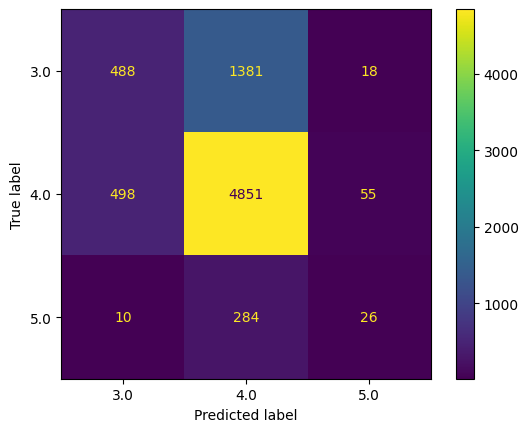

In [348]:
# create confusion matrix and a classification report
X_train, X_test, y_train, y_test = train_test_split(x_train_joined_features, y_train, test_size=0.33, random_state=42)

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

sm.ConfusionMatrixDisplay(sm.confusion_matrix(y_test, y_pred), display_labels=nb.classes_).plot()
report = sm.classification_report(y_test, y_pred)
print(report)